<a href="https://colab.research.google.com/github/Belvinbarasa/Eng.barasa/blob/main/CNC_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn statsmodels prophet pmdarima \
    dask plotly tensorflow transformers streamlit opencv-python geopandas pyngrok --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd

df = pd.read_csv("/content/cnc_machine_data.csv", parse_dates=['timestamp'])
df.set_index('timestamp', inplace=True)
df.head()


,spindle_speed,feed_rate,cutting_force,vibration,temperature,tool_wear,part_position_x,part_position_y,error_code
timestamp,,,,,,,,,
2023-01-01 00:00:00,1649.014246,119.428247,306.017496,0.030806,58.094371,0.156803,316.055507,342.194953,0
2023-01-01 01:00:00,1458.520710,74.094828,336.022845,0.027787,63.440089,0.289374,481.836357,30.198775,0
2023-01-01 02:00:00,1694.306561,76.248937,257.070689,0.024385,53.459129,0.368337,329.054723,340.697451,0
2023-01-01 03:00:00,1956.908957,111.578196,384.775791,0.026379,54.253522,0.508478,176.849341,79.733430,0
2023-01-01 04:00:00,1429.753988,98.713247,197.641656,0.021802,58.507824,0.712573,355.898478,149.659304,0


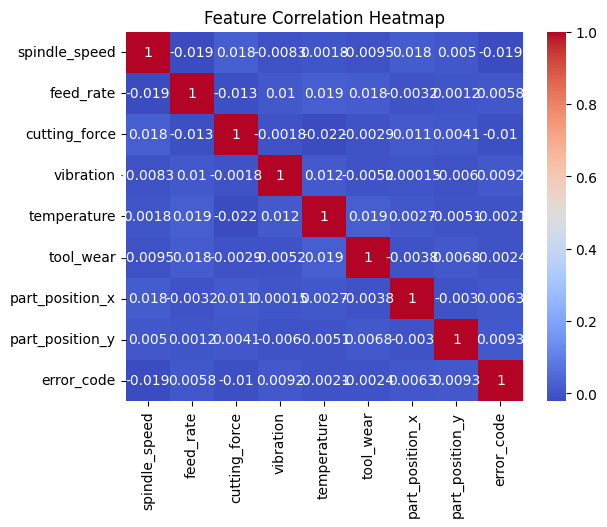

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
df['hour'] = df.index.hour
df['rolling_temp'] = df['temperature'].rolling(24).mean()
df['day_of_year'] = df.index.dayofyear
df.dropna(inplace=True)
df.head()


,spindle_speed,feed_rate,cutting_force,vibration,temperature,tool_wear,part_position_x,part_position_y,error_code,hour,rolling_temp,day_of_year
timestamp,,,,,,,,,,,,
2023-01-01 23:00:00,1072.575544,76.706733,295.766455,0.025664,63.150423,2.371219,205.655230,245.085346,0,23,59.928827,1
2023-01-02 00:00:00,1336.685183,75.921727,223.018715,0.020249,59.366309,2.492236,344.338605,409.352564,0,0,59.981825,2
2023-01-02 01:00:00,1533.276777,104.505134,240.265827,0.028199,59.152883,2.632449,229.952278,86.750230,0,1,59.803191,2
2023-01-02 02:00:00,1154.701927,112.587213,302.182182,0.015193,59.639597,2.823943,9.618674,340.604456,0,2,60.060711,2
2023-01-02 03:00:00,1612.709406,94.018618,306.991264,0.029230,60.535935,2.963660,203.190179,370.669870,0,3,60.322478,2


In [ ]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.01)
df['anomaly'] = model.fit_predict(df[['temperature','vibration']])
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})  # Convert to binary anomaly label


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq9cb_n3m/t69j60zw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq9cb_n3m/v9_a593u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43146', 'data', 'file=/tmp/tmpq9cb_n3m/t69j60zw.json', 'init=/tmp/tmpq9cb_n3m/v9_a593u.json', 'output', 'file=/tmp/tmpq9cb_n3m/prophet_model8t03rc4a/prophet_model-20250502093210.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:32:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:32:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version

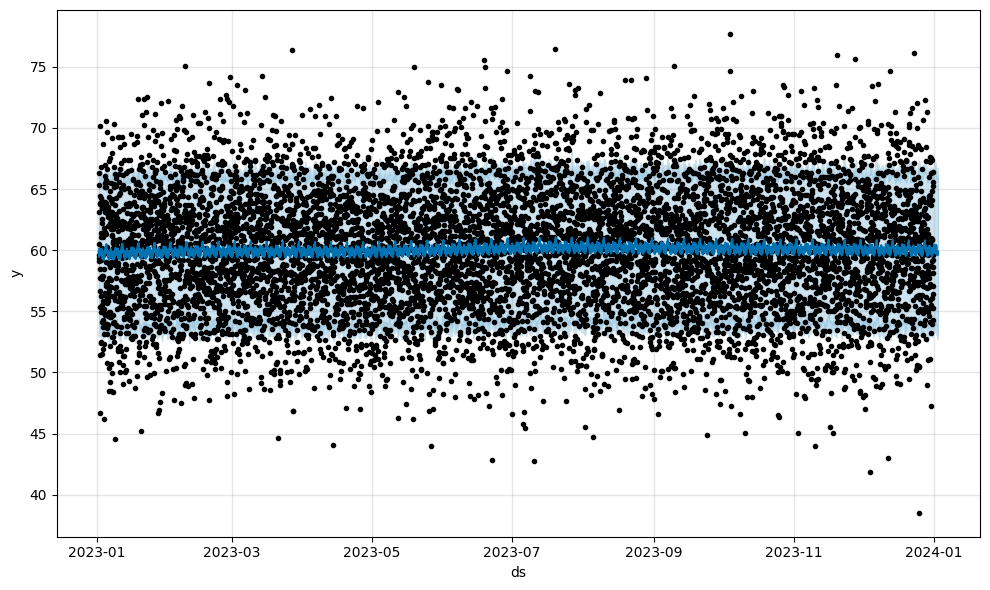

In [ ]:
from prophet import Prophet

prophet_df = df[['temperature']].reset_index().rename(columns={'timestamp': 'ds', 'temperature': 'y'})
m = Prophet()
m.fit(prophet_df)
future = m.make_future_dataframe(48, freq='H')
forecast = m.predict(future)
fig = m.plot(forecast)


In [ ]:
!pip install --upgrade --force-reinstall numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 67.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

data = df['temperature'].values.reshape(-1, 1)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

X, y = [], []
for i in range(50, len(data_scaled)):
    X.append(data_scaled[i-50:i, 0])
    y.append(data_scaled[i, 0])

X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))

model = Sequential([LSTM(64, input_shape=(X.shape[1], 1)), Dense(1)])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=3, batch_size=32)


Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


272/272 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 0.0318
Epoch 2/3
272/272 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.0171
Epoch 3/3
272/272 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 0.0165


In [ ]:
import dask.dataframe as dd

ddf = dd.from_pandas(df.reset_index(), npartitions=4)
ddf.describe().compute()


,timestamp,spindle_speed,feed_rate,cutting_force,vibration,temperature,tool_wear,part_position_x,part_position_y,error_code,hour,rolling_temp,day_of_year,anomaly
count,8737,8737.000000,8737.000000,8737.000000,8737.000000,8737.000000,8737.000000,8737.000000,8737.000000,8737.000000,8737.000000,8737.000000,8737.000000,8737.000000
min,2023-01-01 23:00:00,349.003335,21.551995,107.181234,-0.024656,38.523045,2.371219,0.065006,0.130626,0.000000,0.000000,55.911535,1.000000,0.000000
25%,2023-03-11 05:00:00,1312.554427,87.275739,267.491424,0.013250,56.873531,168.514386,131.394433,126.287487,0.000000,6.000000,59.450564,70.000000,0.000000
50%,2023-06-10 05:15:00,1508.623447,100.769790,300.567332,0.019977,60.204402,383.508922,253.602073,257.134495,0.000000,12.000000,60.166401,161.000000,0.000000
75%,2023-09-09 05:15:00,1714.455850,114.313688,334.765168,0.026899,63.609380,657.106643,376.269925,383.858955,0.000000,18.000000,60.846285,252.000000,0.000000
max,2023-12-31 23:00:00,2677.871312,189.581685,497.116551,0.057278,77.682658,876.741199,499.937550,499.933600,1.000000,23.000000,63.697683,365.000000,1.000000
mean,NaN,1499.906295,100.170737,299.819760,0.019857,60.028475,439.174631,250.460044,251.645561,0.021060,11.501316,60.030287,183.479112,0.010072
std,NaN,303.229401,19.885382,49.476073,0.010159,4.976974,251.541043,143.003074,144.311551,0.143592,6.923280,1.004700,105.095490,0.099859


In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['vibration', 'hour']]
y_temp = df['temperature']
y_anom = df['anomaly']

# Split both target variables (y_temp and y_anom) using the same indices
X_train, X_test, y_temp_train, y_temp_test, y_anom_train, y_anom_test = train_test_split(
    X, y_temp, y_anom, test_size=0.2, random_state=42 # Added random_state for reproducibility
)

reg = LinearRegression().fit(X_train, y_temp_train)
print("Linear Regression R^2:", reg.score(X_test, y_temp_test))

clf = LogisticRegression().fit(X_train, y_anom_train) # Use y_anom_train, not y_anom
print("Logistic Regression Accuracy:", clf.score(X_test, y_anom_test))

Linear Regression R^2: 7.086380413623417e-05
Logistic Regression Accuracy: 0.9868421052631579


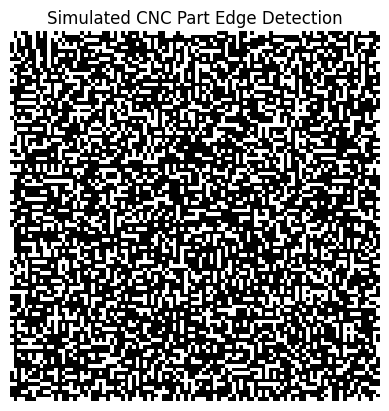

In [ ]:
import geopandas as gpd
import cv2
import matplotlib.pyplot as plt

# Dummy image analysis example
image = np.random.randint(0, 255, (100, 100, 3), dtype=np.uint8)
edges = cv2.Canny(image, 100, 200)

plt.imshow(edges, cmap='gray')
plt.title("Simulated CNC Part Edge Detection")
plt.axis('off')
plt.show()


In [ ]:
def prepare_single_step_data(series, lookback=24):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(series.values.reshape(-1, 1))
    X, y = [], []
    for i in range(len(scaled) - lookback):
        X.append(scaled[i:i + lookback])
        y.append(scaled[i + lookback])
    return np.array(X), np.array(y), scaler

def train_and_predict_single_value(series, lookback=24):
    X, y, scaler = prepare_single_step_data(series, lookback)

    model = Sequential([
        LSTM(50, activation='relu', input_shape=(lookback, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=5, verbose=0)

    last_seq = series.values[-lookback:].reshape(-1, 1)
    last_seq_scaled = scaler.transform(last_seq)
    pred = model.predict(last_seq_scaled.reshape(1, lookback, 1), verbose=0)

    return scaler.inverse_transform(pred)[0][0]


In [ ]:
import pandas as pd
import numpy as np

def generate_sample_cnc_data(filename='sample_data.csv', hours=365*24, seed=42):
    np.random.seed(seed)

    # Generate timestamps for 1 year (hourly)
    timestamps = pd.date_range(start='2024-01-01', periods=hours, freq='H')

    # Simulate temperature data
    base_temp = 50
    temperature = base_temp + 10 * np.sin(np.linspace(0, 20 * np.pi, hours)) + np.random.normal(0, 2, hours)

    # Simulate vibration data
    base_vibration = 5
    vibration = base_vibration + 2 * np.sin(np.linspace(0, 10 * np.pi, hours)) + np.random.normal(0, 0.5, hours)

    # Simulate GPS coordinates (Kenya-based)
    lat_center, lon_center = -1.2921, 36.8219
    latitude = lat_center + np.random.normal(0, 0.01, hours)
    longitude = lon_center + np.random.normal(0, 0.01, hours)

    # Create DataFrame
    df = pd.DataFrame({
        'timestamp': timestamps,
        'temperature': temperature,
        'vibration': vibration,
        'latitude': latitude,
        'longitude': longitude
    })

    df.to_csv(filename, index=False)
    print(f"✅ Sample CNC data saved to: {filename}")

# Run directly
if __name__ == '__main__':
    generate_sample_cnc_data()


<ipython-input-2-a093926de494>:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range(start='2024-01-01', periods=hours, freq='H')


✅ Sample CNC data saved to: sample_data.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def make_predictions(df):
    """
    Adds lag-based features and returns DataFrame with predicted temperature and vibration columns.
    """

    # Ensure timestamp is datetime and sorted
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df = df.sort_values('timestamp')

    # Create lag features
    df['temp_lag1'] = df['temperature'].shift(1)
    df['vib_lag1'] = df['vibration'].shift(1)

    # Drop NA
    df = df.dropna()

    # Features and targets
    X = df[['temp_lag1', 'vib_lag1']]
    y_temp = df['temperature']
    y_vib = df['vibration']

    # Train/test split (no shuffling for time series)
    X_train, X_test, y_temp_train, y_temp_test = train_test_split(X, y_temp, test_size=0.2, shuffle=False)
    _, _, y_vib_train, y_vib_test = train_test_split(X, y_vib, test_size=0.2, shuffle=False)

    # Temperature model
    model_temp = LinearRegression()
    model_temp.fit(X_train, y_temp_train)
    temp_preds = model_temp.predict(X_test)

    # Vibration model
    model_vib = LinearRegression()
    model_vib.fit(X_train, y_vib_train)
    vib_preds = model_vib.predict(X_test)

    # Append predictions
    df_pred = df.iloc[-len(temp_preds):].copy()
    df_pred['Predicted Temperature'] = temp_preds
    df_pred['Predicted Vibration'] = vib_preds

    return df_pred


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import datetime

# Set Streamlit config
st.set_page_config(page_title="CNC Machine Dashboard (Temperature Prediction Only)", layout="wide")

# Title
st.title("🛠️ CNC Machine Sensor Dashboard")

# Load or upload data
uploaded_file = st.file_uploader("Upload your CNC machine CSV file", type=["csv"])
if uploaded_file:
    df = pd.read_csv(uploaded_file)
else:
    df = pd.read_csv("sample_data.csv")  # fallback to built-in CSV

# Preprocessing
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')

# Sidebar
st.sidebar.header("📊 Plot Controls")
selected_feature = st.sidebar.selectbox("Select sensor to view", ["temperature", "vibration"])

# Time series plot
st.markdown("### 📈 Time Series Plot")
fig = px.line(df, x='timestamp', y=selected_feature, title=f"{selected_feature.capitalize()} Over Time")
st.plotly_chart(fig, use_container_width=True)

# Combined chart
st.markdown("### 🔄 Sensor Overview")
fig2 = px.line(df, x='timestamp', y=['temperature', 'vibration'], title="Sensor Trends")
st.plotly_chart(fig2, use_container_width=True)

# Map view
st.markdown("### 🗺️ CNC Machine Location")
fig3 = px.scatter_mapbox(
    df, lat="latitude", lon="longitude", color="temperature",
    mapbox_style="open-street-map", zoom=6, height=400,
    title="Machine Location Colored by Temperature"
)
st.plotly_chart(fig3, use_container_width=True)

# ---------------- PREDICTION (TEMPERATURE ONLY) ----------------
st.markdown("## 🔮 Forecast Future Temperature Readings")

def prepare_lstm_data(series, lookback=24):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(series.reshape(-1, 1))
    X, y = [], []
    for i in range(len(scaled) - lookback):
        X.append(scaled[i:i + lookback])
        y.append(scaled[i + lookback])
    return np.array(X), np.array(y), scaler

def train_and_forecast(series, lookback=24, future_steps=24):
    X, y, scaler = prepare_lstm_data(series.values, lookback)
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(lookback, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=5, verbose=0)

    last_seq = series.values[-lookback:].reshape(-1, 1)
    last_seq_scaled = scaler.transform(last_seq)
    predictions = []
    current = last_seq_scaled.copy()
    for _ in range(future_steps):
        pred = model.predict(current.reshape(1, lookback, 1), verbose=0)
        predictions.append(pred[0][0])
        current = np.vstack([current[1:], pred])

    return scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

# Run prediction
if st.button("Forecast Next 24 Hours of Temperature"):
    forecast_values = train_and_forecast(df['temperature'])
    future_dates = [df['timestamp'].iloc[-1] + datetime.timedelta(hours=i+1) for i in range(24)]

    fig_pred = px.line(
        x=future_dates, y=forecast_values,
        labels={'x': 'Timestamp', 'y': 'Predicted Temperature'},
        title="Predicted Temperature for Next 24 Hours"
    )
    st.plotly_chart(fig_pred, use_container_width=True)

# Footer
st.markdown("---")
st.markdown("🧠 Powered by LSTM | Single Feature Forecasting Only (Temperature)")


2025-05-02 10:34:17.232 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-02 10:34:17.238 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-02 10:34:17.908 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-02 10:34:17.918 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-02 10:34:17.920 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-02 10:34:17.926 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-02 10:34:17.926 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

DeltaGenerator()

In [ ]:
!pip install --upgrade --force-reinstall pyngrok # Reinstall pyngrok to ensure the latest version is used
from pyngrok import ngrok, conf

# Configure ngrok with authtoken and region
conf.get_default().auth_token = "2wU84MOemqOFtneTuOtUZntZCdU_4YPooGTNzi7XSyPxc2PHq" # Replace with your authtoken

# Connect with specific configuration
tunnel = ngrok.connect(addr="8501", proto="http") # Set the port using the 'addr' argument
public_url = tunnel.public_url

print("Streamlit app running at:", public_url)

!streamlit run streamlit_app.py --server.port 8501

  Using cached pyngrok-7.2.5-py3-none-any.whl.metadata (8.9 kB)
  Using cached PyYAML-6.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
Using cached pyngrok-7.2.5-py3-none-any.whl (23 kB)
Using cached PyYAML-6.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (762 kB)
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0.2
    Uninstalling PyYAML-6.0.2:
      Successfully uninstalled PyYAML-6.0.2
  Attempting uninstall: pyngrok
    Found existing installation: pyngrok 7.2.5
    Uninstalling pyngrok-7.2.5:
      Successfully uninstalled pyngrok-7.2.5
Streamlit app running at: https://27b4-34-74-82-141.ngrok-free.app



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.74.82.141:8501

────────────────────────── Traceback (most recent call last) ───────────────────────────
  /usr/local/lib/python3.11/dist-packages/stre